In [1]:
import pltutils as pltu
import numpy as np
from keras import layers
from keras.layers import Conv2D, Activation, Add, Flatten, Dense, Input, Reshape, MaxPooling2D
from keras.models import Model,Sequential
from keras.datasets import cifar100
from keras.utils import np_utils

Using TensorFlow backend.


In [8]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
train = x_train/255.
test = x_test/255.
cls_train = y_train
cls_test = y_test
cat_train = np_utils.to_categorical(y_train, num_classes=100)
cat_test = np_utils.to_categorical(y_test, num_classes=100)
train.shape

(50000, 32, 32, 3)

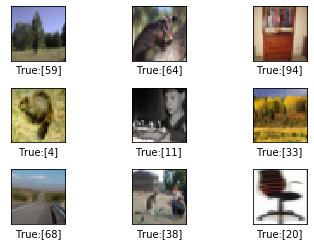

In [9]:
start = 110
end = start+10
pltu.plot_images(train[start:end],cls_train[start:end])

In [4]:
def ResidualBlock(filters, input_shape=(28,28,1)):
    X_input = Input(input_shape)
    X_shortcut = Conv2D(filters,(1,1), padding='same')(X_input)
    X = X_input
    X = Conv2D(filters,(3,3), padding='same')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters,(3,3), padding='same')(X)
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    model = Model(inputs=X_input, outputs=X)
    return model


In [57]:
def ResNet():
    X_input = Input((32,32,3))
    X = Reshape((32,32,3),input_shape=(32,32,3))(X_input)
    X = ResidualBlock(16, input_shape=(32,32,3))(X)
    
    X = MaxPooling2D((2,2))(X)
    X = ResidualBlock(32, input_shape=(16,16,16))(X)
    
    X = MaxPooling2D((2,2))(X)
    X = ResidualBlock(64, input_shape=(8,8,32))(X)
    
    #X = MaxPooling2D((2,2))(X)
#     X = ResidualBlock(128, input_shape=(4,4,64))(X)
    
    #X = MaxPooling2D((2,2))(X)
    X = Flatten()(X)
    X = Dense(1000, activation='relu')(X)
    X = Dense(100,activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X)
   
    #model = Sequential()
    return model
    

In [58]:
model = ResNet()
model.summary()

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
model_17 (Model)             (None, 32, 32, 16)        2832      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
model_18 (Model)             (None, 16, 16, 32)        14432     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
model_19 (Model)             (None, 8, 8, 64)          575

In [59]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

In [68]:
model.fit(train, cat_train, epochs=1, batch_size=128)

Epoch 1/1
50000/50000 [==============================] - 7s 136us/step - loss: 0.4321 - accuracy: 0.8708


In [69]:
loss, accuracy = model.evaluate(test,cat_test)
print ("loss:{0}, accuracy:{1}".format(loss, accuracy))

10000/10000 [==============================] - 1s 132us/step
loss:3.704661808013916, accuracy:0.37040001153945923


In [10]:
cat_test_pred = model.predict(test)
cls_test_pred = np.argmax(cat_test_pred, axis=1)

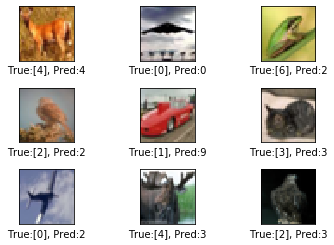

In [11]:
start = 110
end = start+10
pltu.plot_images(test[start:end],cls_test[start:end],cls_test_pred[start:end])

In [ ]:
plot_error_images